# Baixando e setando configurações para a linguagem portuguesa

In [ ]:
! apt-get install tesseract-ocr
! apt-get install tesseract-ocr

In [6]:
# listando os idiomas disponíveis
!tesseract --list-langs

List of available languages (3):
eng
osd
por


In [ ]:
# deixando o idioma português disponível

! mkdir tessdata
! wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
! wget -O ./tessdata/osd.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/osd.traineddata?raw=true

In [1]:
import pytesseract
import numpy as np
import cv2
from matplotlib import pyplot as plt

## TESTE 1
- pegando texto de imagem

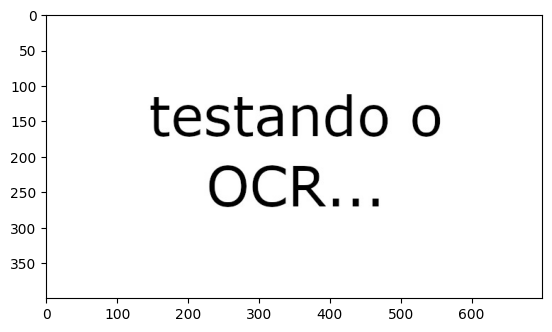

In [2]:
path_image = "images/teste01.jpg"
img = cv2.imread(path_image)
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image) # mudando o padrão de cores BGR para RGB

In [3]:
texto = pytesseract.image_to_string(rgb_image)
print(texto)

testando o
OCR...



## TESTE 2

- Suporte para caracteres especiais

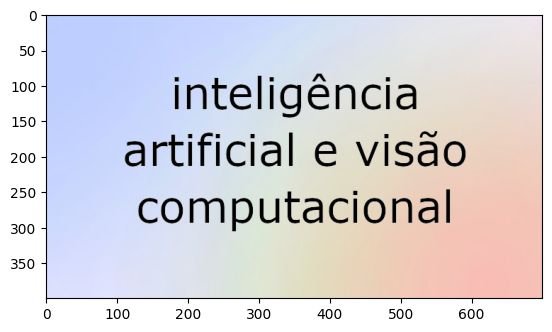

In [4]:
path_image = "images/teste02.jpg"
img2 = cv2.imread(path_image)
rgb_image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image2)

In [5]:
config_tesseract = "--tessdata-dir tessdata"
texto = pytesseract.image_to_string(rgb_image2, lang='por', config=config_tesseract)
print(texto)

inteligência
artificial e visão
computacional



## Page segmentation modes

In [6]:
! tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


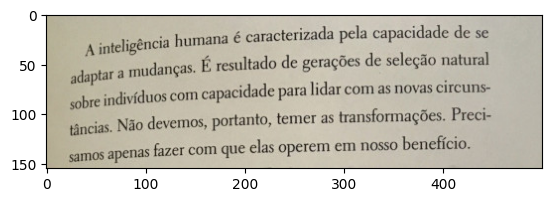

In [7]:
path_image = "images/trecho-livro.jpg"
img = cv2.imread(path_image)
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [8]:
texto = pytesseract.image_to_string(rgb_image, lang='por', config='--psm 6')
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças É resultado de gerações de seleção natural
dobre indivíduos com capacidade para lidar com as novas circuns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
amos apenas fazer com que elas operem em nosso benefício.



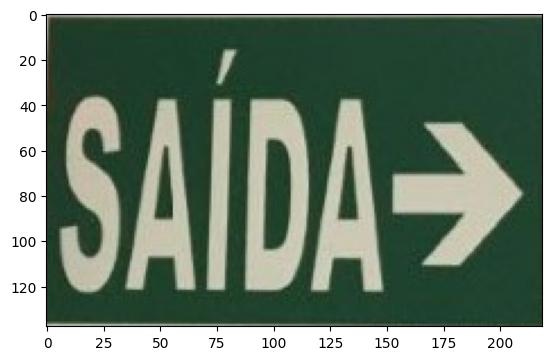

In [9]:
# Testar outro modo, onde apenas uma linha está presente
path_image = "images/saida.jpg"
img = cv2.imread(path_image)
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [10]:
config_tesseract = "--tessdata-dir tessdata --psm 7"
texto = pytesseract.image_to_string(rgb_image, lang='por', config=config_tesseract)
print(texto)

SAÍDA>



## Detecção de orientação da página

In [11]:
from PIL import Image

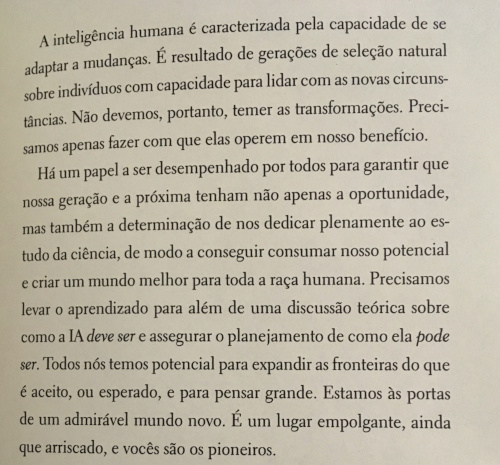

In [12]:
path_image = "images/livro01.jpg"
img = Image.open(path_image)
img

In [13]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.66
Script: Latin
Script confidence: 13.33



## Seleção de textos

In [14]:
from pytesseract import Output

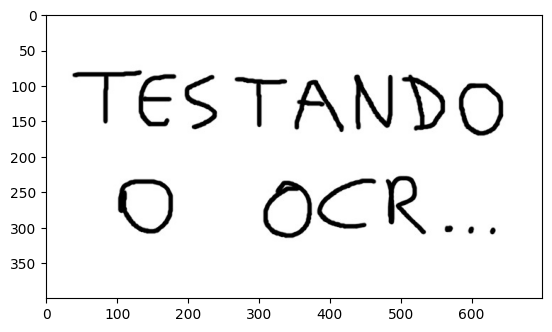

In [15]:
path_image = "images/teste_manuscrito_01.jpg"
img = cv2.imread(path_image)
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [16]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb_image, lang='por', config=config_tesseract, output_type=Output.DICT)
print(resultado)

{'level': [1, 2, 3, 4, 5, 4, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 2, 2, 2], 'word_num': [0, 0, 0, 0, 1, 0, 1, 2], 'left': [0, 38, 38, 38, 38, 102, 102, 307], 'top': [0, 79, 79, 79, 79, 228, 233, 228], 'width': [700, 607, 607, 607, 607, 532, 77, 327], 'height': [400, 236, 236, 92, 92, 87, 76, 87], 'conf': [-1, -1, -1, -1, 90, -1, 74, 66], 'text': ['', '', '', '', 'TESTANDO', '', 'O', 'OCR...']}


In [17]:
from PIL import ImageFont, Image, ImageDraw
fonte_dir = "./fontes/arial.ttf"

In [18]:
def escreve_texto(texto: str, x, y, img, fonte, tamanho_texto=32):
    font = ImageFont.truetype(fonte, tamanho_texto)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    # Colcoando cor no texto
    draw.text((x, y), texto, font=font, fill=(255, 0, 0, 0))
    img = np.array(img_pil)
    return img

def caixa_texto(resultado, img, cor = (255, 100, 0)):
    x = resultado['left'][i]
    y = resultado['top'][i]
    w = resultado['width'][i]
    h = resultado['height'][i]

    cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

    return x, y, img

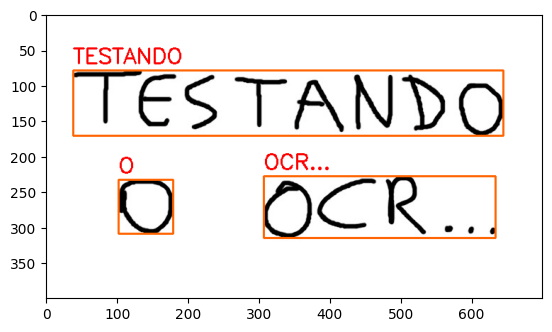

In [19]:
rgb_copy = rgb_image.copy()
for i in range(0, len(resultado['text'])):
    confianca = int(resultado['conf'][i])
    if confianca > 40:
        x, y, img = caixa_texto(resultado, rgb_copy)
        texto = resultado['text'][i]
        cv2.putText(img, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        #img = escreve_texto(texto, x, y, img, fonte_dir)

plt.imshow(img)

## Seleção com um texto mais complexo

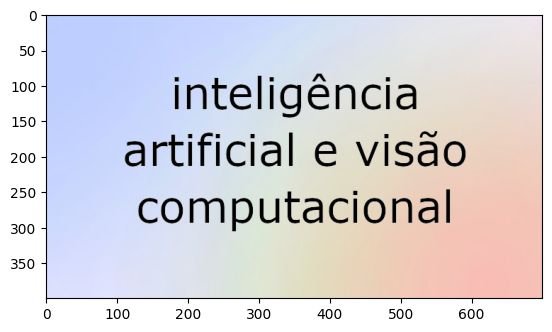

In [35]:
path_image = "images/teste02.jpg"
img = cv2.imread(path_image)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [36]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, lang='por', config=config_tesseract, output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'conf': [-1, -1, -1, -1, 91, -1, 88, 93, 91, -1, 91],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional']}

In [37]:
from PIL import ImageFont, Image, ImageDraw
fonte_dir = "./fontes/calibri.ttf"

In [38]:
def escreve_texto(texto: str, x, y, img, fonte, tamanho_texto=32):
    font = ImageFont.truetype(fonte, tamanho_texto)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    # Colcoando cor no texto
    draw.text((x, y), texto, font=font, fill=(255, 0, 0, 0))
    img = np.array(img_pil)
    return img

def caixa_texto(resultado, img, cor = (255, 100, 0)):
    x = resultado['left'][i]
    y = resultado['top'][i]
    w = resultado['width'][i]
    h = resultado['height'][i]

    cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

    return x, y, img

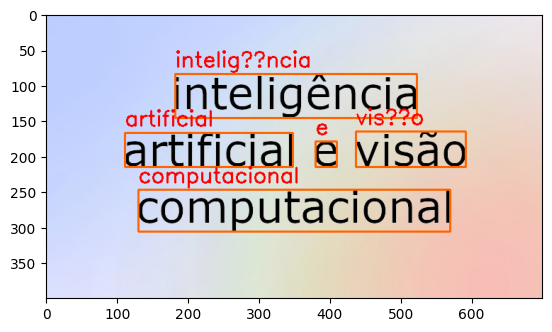

In [40]:
rgb_copy = rgb.copy()
for i in range(0, len(resultado['text'])):
    confianca = int(resultado['conf'][i])
    if confianca > 40:
        x, y, img = caixa_texto(resultado, rgb_copy)
        texto = resultado['text'][i]
        cv2.putText(img, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        #img = escreve_texto(texto, x, y, img, fonte_dir)

plt.imshow(img)